In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import re
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
df = pd.read_csv('FundingProject.csv')

In [3]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1015685046,Organic Tattoo remains 10 days (Self use & cus...,Accessories,Fashion,CAD,1/1/2016,6000,12/7/2015 18:21,100.0,failed,2,CA,74.84,70.89,4253.51
1,1019043170,Handcrafted leather wallet | key holder | card...,Accessories,Fashion,EUR,1/1/2016,2000,12/11/2015 10:52,2102.0,successful,48,BE,2314.01,2282.97,2172.19
2,1036288991,The Liaisons: a new twist on the old standards,Jazz,Music,USD,1/1/2016,5000,11/9/2015 20:12,5630.0,successful,116,US,5630.00,5630.00,5000.00
3,1045749249,The Many Encounters of Bosley Bear,Children's Books,Publishing,USD,1/1/2016,20000,11/24/2015 2:08,101.0,failed,2,US,101.00,101.00,20000.00
4,1048577059,Swift & Co | Innovative Men's Footwear,Footwear,Fashion,GBP,1/1/2016,40000,11/17/2015 12:30,2246.0,failed,19,GB,3416.59,3273.48,58298.84


In [4]:
df['enum_state'] = df['state'].replace(df['state'].unique().tolist(), list(range(0,len(df['state'].unique().tolist()))))

In [5]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,enum_state
0,1015685046,Organic Tattoo remains 10 days (Self use & cus...,Accessories,Fashion,CAD,1/1/2016,6000,12/7/2015 18:21,100.0,failed,2,CA,74.84,70.89,4253.51,0
1,1019043170,Handcrafted leather wallet | key holder | card...,Accessories,Fashion,EUR,1/1/2016,2000,12/11/2015 10:52,2102.0,successful,48,BE,2314.01,2282.97,2172.19,1
2,1036288991,The Liaisons: a new twist on the old standards,Jazz,Music,USD,1/1/2016,5000,11/9/2015 20:12,5630.0,successful,116,US,5630.00,5630.00,5000.00,1
3,1045749249,The Many Encounters of Bosley Bear,Children's Books,Publishing,USD,1/1/2016,20000,11/24/2015 2:08,101.0,failed,2,US,101.00,101.00,20000.00,0
4,1048577059,Swift & Co | Innovative Men's Footwear,Footwear,Fashion,GBP,1/1/2016,40000,11/17/2015 12:30,2246.0,failed,19,GB,3416.59,3273.48,58298.84,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110815 entries, 0 to 110814
Data columns (total 16 columns):
ID                  110815 non-null int64
name                110814 non-null object
category            110815 non-null object
main_category       110815 non-null object
currency            110815 non-null object
deadline            110815 non-null object
goal                110815 non-null int64
launched            110815 non-null object
pledged             110815 non-null float64
state               110815 non-null object
backers             110815 non-null int64
country             110815 non-null object
usd pledged         109999 non-null float64
usd_pledged_real    110815 non-null float64
usd_goal_real       110815 non-null float64
enum_state          110815 non-null int64
dtypes: float64(4), int64(4), object(8)
memory usage: 13.5+ MB


In [7]:
df.isnull().sum()

ID                    0
name                  1
category              0
main_category         0
currency              0
deadline              0
goal                  0
launched              0
pledged               0
state                 0
backers               0
country               0
usd pledged         816
usd_pledged_real      0
usd_goal_real         0
enum_state            0
dtype: int64

In [8]:
df1 = df.select_dtypes(exclude=['object'])
df2 = df.select_dtypes(include=['object'])

In [9]:
df1.head()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,enum_state
0,1015685046,6000,100.0,2,74.84,70.89,4253.51,0
1,1019043170,2000,2102.0,48,2314.01,2282.97,2172.19,1
2,1036288991,5000,5630.0,116,5630.00,5630.00,5000.00,1
3,1045749249,20000,101.0,2,101.00,101.00,20000.00,0
4,1048577059,40000,2246.0,19,3416.59,3273.48,58298.84,0


### Exploring Numeric Data

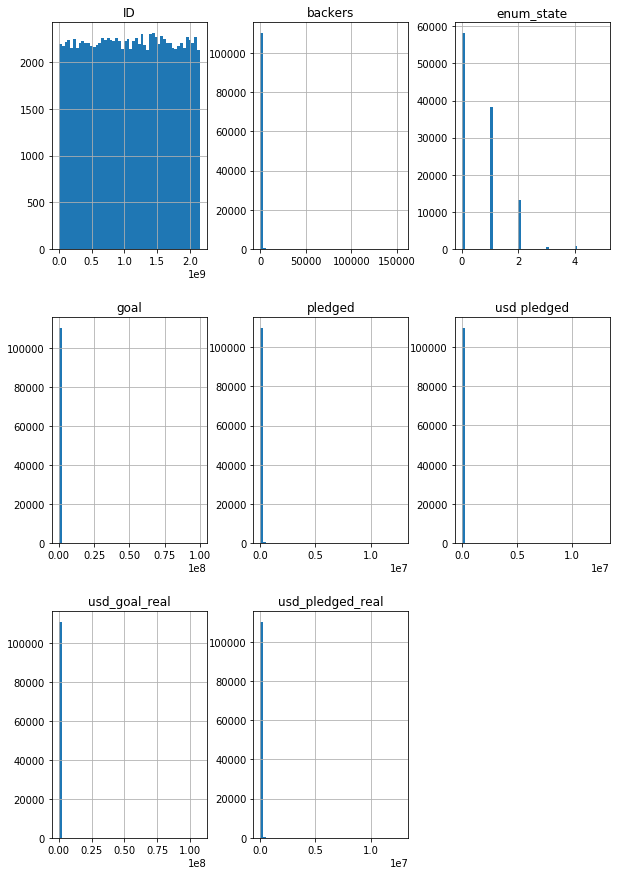

In [10]:
df1.hist(bins=50, figsize=(10, 15))
plt.show()

In [11]:
df1['backers'].skew()

67.4703001078742

In [12]:
df1['backers'] = df1['backers'].apply(lambda x: np.log(x+1))
df1['goal'] = df1['goal'].apply(lambda x: np.log(x+1))
df1['pledged'] = df1['pledged'].apply(lambda x: np.log(x+1))
df1['usd pledged'] = df1['usd pledged'].apply(lambda x: np.log(x+1))
df1['usd_goal_real'] = df1['usd_goal_real'].apply(lambda x: np.log(x+1))
df1['usd_pledged_real'] = df1['usd_pledged_real'].apply(lambda x: np.log(x+1))

/Users/michael/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/michael/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/michael/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

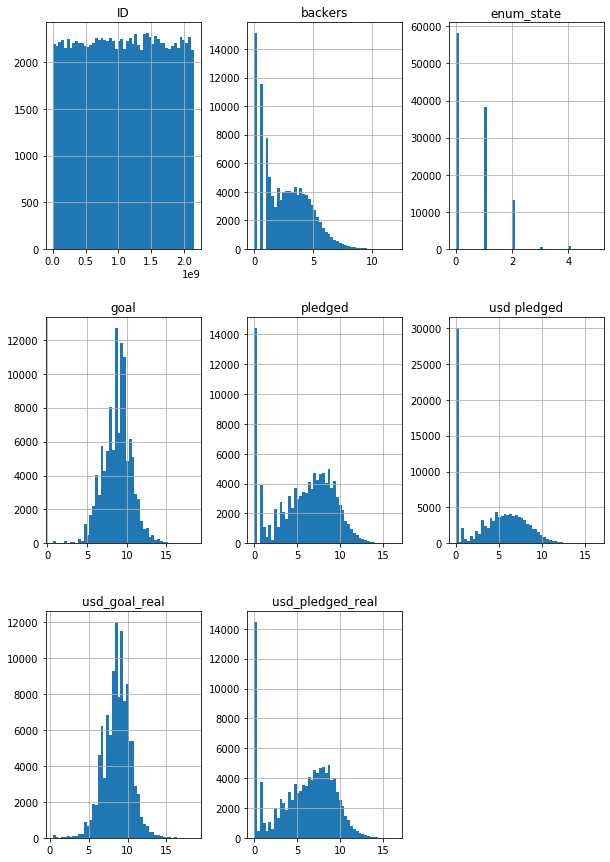

In [13]:
df1.hist(bins=50, figsize=(10, 15))
plt.show()

In [14]:
df1['usd pledged'].fillna(df1['usd pledged'].median(), inplace=True)

/Users/michael/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [15]:
df1['backers_bool'] = (df1['backers'] > np.log(1)) & 1
df1['pledged_bool'] = (df1['pledged'] > np.log(1)) & 1
df1['usd_pledged_bool'] = (df1['usd pledged'] > np.log(1)) & 1
df1['usd_pledged_real_bool'] = (df1['usd_pledged_real'] > np.log(1)) & 1

/Users/michael/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/michael/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/michael/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [16]:
df1.head()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,enum_state,backers_bool,pledged_bool,usd_pledged_bool,usd_pledged_real_bool
0,1015685046,8.699681,4.615121,1.098612,4.328626,4.275137,8.355735,0,True,True,True,True
1,1019043170,7.601402,7.651120,3.891820,7.747169,7.733670,7.683951,1,True,True,True,True
2,1036288991,8.517393,8.636042,4.762174,8.636042,8.636042,8.517393,1,True,True,True,True
3,1045749249,9.903538,4.624973,1.098612,4.624973,4.624973,9.903538,0,True,True,True,True
4,1048577059,10.596660,7.717351,2.995732,8.136691,8.093914,10.973355,0,True,True,True,True


In [17]:
df1['backers_bool'].replace([True, False], [1,0], inplace=True)
df1['pledged_bool'].replace([True, False], [1,0], inplace=True)
df1['usd_pledged_bool'].replace([True, False], [1,0], inplace=True)
df1['usd_pledged_real_bool'].replace([True, False], [1,0], inplace=True)

/Users/michael/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [18]:
df1.head()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,enum_state,backers_bool,pledged_bool,usd_pledged_bool,usd_pledged_real_bool
0,1015685046,8.699681,4.615121,1.098612,4.328626,4.275137,8.355735,0,1,1,1,1
1,1019043170,7.601402,7.651120,3.891820,7.747169,7.733670,7.683951,1,1,1,1,1
2,1036288991,8.517393,8.636042,4.762174,8.636042,8.636042,8.517393,1,1,1,1,1
3,1045749249,9.903538,4.624973,1.098612,4.624973,4.624973,9.903538,0,1,1,1,1
4,1048577059,10.596660,7.717351,2.995732,8.136691,8.093914,10.973355,0,1,1,1,1


### Object Data

In [19]:
df2.head(20)

,name,category,main_category,currency,deadline,launched,state,country
0,Organic Tattoo remains 10 days (Self use & cus...,Accessories,Fashion,CAD,1/1/2016,12/7/2015 18:21,failed,CA
1,Handcrafted leather wallet | key holder | card...,Accessories,Fashion,EUR,1/1/2016,12/11/2015 10:52,successful,BE
2,The Liaisons: a new twist on the old standards,Jazz,Music,USD,1/1/2016,11/9/2015 20:12,successful,US
3,The Many Encounters of Bosley Bear,Children's Books,Publishing,USD,1/1/2016,11/24/2015 2:08,failed,US
4,Swift & Co | Innovative Men's Footwear,Footwear,Fashion,GBP,1/1/2016,11/17/2015 12:30,failed,GB
5,LEMON LIGHTS Debut Album + busking Tour 2016,World Music,Music,EUR,1/1/2016,11/3/2015 16:01,successful,DE
6,Help Will Abele Finish His First Full Length A...,Hip-Hop,Music,USD,1/1/2016,12/7/2015 4:34,failed,US
7,Dodo Tool. A handy tool that can travel & stay...,Product Design,Design,USD,1/1/2016,11/16/2015 12:35,canceled,US
8,Breathable x Water Proof hoodie w/10+ Practica...,Apparel,Fashion,USD,1/1/2016,11/12/2015 17:16,successful,US
9,Jo's Travel Journals,Literary Journals,Publishing,CAD,1/1/2016,12/2/2015 22:43,failed,CA


In [20]:
df2['deadline'] = pd.to_datetime(df2['deadline'])
df2['launched'] = pd.to_datetime(df2['launched'])
df2['days_diff'] = (df2['deadline'] - df2['launched']).dt.days
df2['deadline_day'] = df2['deadline'].dt.day
df2['deadline_year'] = df2['deadline'].dt.year
df2['deadline_month'] = df2['deadline'].dt.month
df2['launched_day'] = df2['launched'].dt.day
df2['launched_year'] = df2['launched'].dt.year
df2['launched_month'] = df2['launched'].dt.month
df2.drop(['deadline', 'launched'], axis=1, inplace=True)

/Users/michael/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/michael/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/michael/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [21]:
df2.head()

,name,category,main_category,currency,state,country,days_diff,deadline_day,deadline_year,deadline_month,launched_day,launched_year,launched_month
0,Organic Tattoo remains 10 days (Self use & cus...,Accessories,Fashion,CAD,failed,CA,24,1,2016,1,7,2015,12
1,Handcrafted leather wallet | key holder | card...,Accessories,Fashion,EUR,successful,BE,20,1,2016,1,11,2015,12
2,The Liaisons: a new twist on the old standards,Jazz,Music,USD,successful,US,52,1,2016,1,9,2015,11
3,The Many Encounters of Bosley Bear,Children's Books,Publishing,USD,failed,US,37,1,2016,1,24,2015,11
4,Swift & Co | Innovative Men's Footwear,Footwear,Fashion,GBP,failed,GB,44,1,2016,1,17,2015,11


In [22]:
df2.drop(['state'], axis=1, inplace=True)
df2.head()

/Users/michael/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,name,category,main_category,currency,country,days_diff,deadline_day,deadline_year,deadline_month,launched_day,launched_year,launched_month
0,Organic Tattoo remains 10 days (Self use & cus...,Accessories,Fashion,CAD,CA,24,1,2016,1,7,2015,12
1,Handcrafted leather wallet | key holder | card...,Accessories,Fashion,EUR,BE,20,1,2016,1,11,2015,12
2,The Liaisons: a new twist on the old standards,Jazz,Music,USD,US,52,1,2016,1,9,2015,11
3,The Many Encounters of Bosley Bear,Children's Books,Publishing,USD,US,37,1,2016,1,24,2015,11
4,Swift & Co | Innovative Men's Footwear,Footwear,Fashion,GBP,GB,44,1,2016,1,17,2015,11


In [23]:
df2['category'].unique()

array(['Accessories', 'Jazz', "Children's Books", 'Footwear',
       'World Music', 'Hip-Hop', 'Product Design', 'Apparel',
       'Literary Journals', 'Plays', 'Web', 'Restaurants', 'Music',
       'Television', 'Photobooks', 'Comedy', 'Video Games', 'Webcomics',
       'DIY Electronics', 'Architecture', 'Shorts', 'Apps', 'Nonfiction',
       'Hardware', 'Flight', 'Small Batch', 'Tabletop Games', 'R&B',
       'Games', 'Country & Folk', 'Metal', 'Indie Rock', 'Technology',
       'Journalism', 'Fashion', 'Comic Books', 'Documentary', 'Poetry',
       'Horror', 'Academic', 'Farms', 'Faith', 'Crafts', 'Food',
       'Publishing', 'Drama', 'Audio', 'Sound', 'Festivals',
       'Playing Cards', 'Science Fiction', 'Jewelry', 'Vegan',
       'Anthologies', 'Gadgets', 'Webseries', 'People', 'Nature',
       'Wearables', 'Musical', 'Digital Art', 'Fiction', 'Periodicals',
       'Makerspaces', 'Illustration', 'Graphic Novels', 'Painting',
       'Video', 'Public Art', 'Classical Music', 'Rock

In [24]:
df2.main_category.unique()

array(['Fashion', 'Music', 'Publishing', 'Design', 'Theater',
       'Technology', 'Food', 'Film & Video', 'Photography', 'Games',
       'Comics', 'Journalism', 'Crafts', 'Art', 'Dance'], dtype=object)

In [25]:
df2.country.unique()

array(['CA', 'BE', 'US', 'GB', 'DE', 'AU', 'N,0"', 'DK', 'NZ', 'IE', 'IT',
       'FR', 'SE', 'CH', 'ES', 'NL', 'AT', 'NO', 'LU', 'SG', 'HK', 'MX',
       'JP'], dtype=object)

In [26]:
df2['country'].replace('N,0"', 'NO', inplace=True)

/Users/michael/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [27]:
df2['currency'].unique()

array(['CAD', 'EUR', 'USD', 'GBP', 'AUD', 'DKK', 'NZD', 'NOK', 'SEK',
       'CHF', 'SGD', 'HKD', 'MXN', 'JPY'], dtype=object)

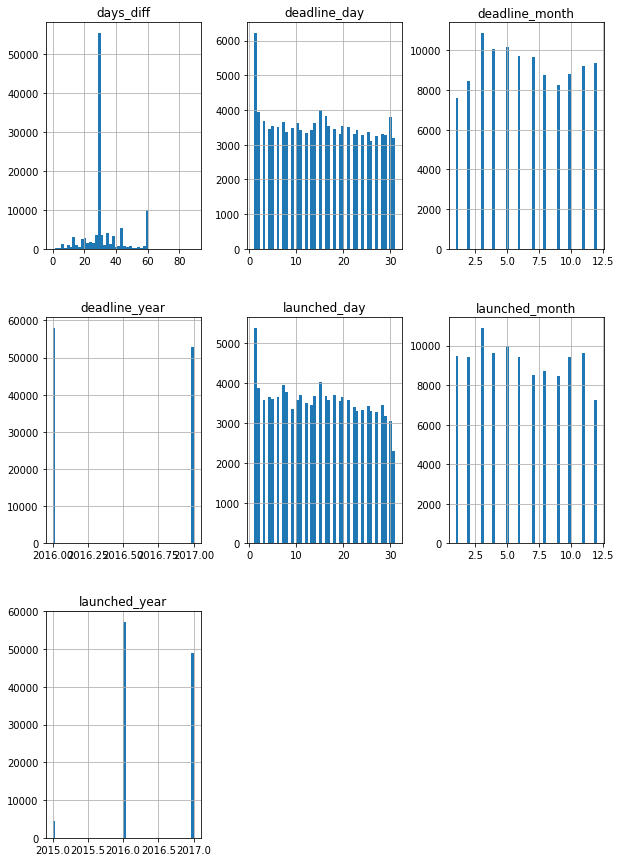

In [28]:
df2.hist(bins=50, figsize=(10, 15))
plt.show()

In [29]:
df2_noname = pd.get_dummies(df2.drop('name', axis=1), drop_first=True)

In [30]:
df2_noname.head()

,days_diff,deadline_day,deadline_year,deadline_month,launched_day,launched_year,launched_month,category_Academic,category_Accessories,category_Action,...,country_IT,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,24,1,2016,1,7,2015,12,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,20,1,2016,1,11,2015,12,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,52,1,2016,1,9,2015,11,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,37,1,2016,1,24,2015,11,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,44,1,2016,1,17,2015,11,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
df_clean = pd.concat([df1, df2_noname], axis=1, join='inner')

In [32]:
df_clean.head()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,enum_state,backers_bool,pledged_bool,...,country_IT,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,1015685046,8.699681,4.615121,1.098612,4.328626,4.275137,8.355735,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1019043170,7.601402,7.651120,3.891820,7.747169,7.733670,7.683951,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1036288991,8.517393,8.636042,4.762174,8.636042,8.636042,8.517393,1,1,1,...,0,0,0,0,0,0,0,0,0,1
3,1045749249,9.903538,4.624973,1.098612,4.624973,4.624973,9.903538,0,1,1,...,0,0,0,0,0,0,0,0,0,1
4,1048577059,10.596660,7.717351,2.995732,8.136691,8.093914,10.973355,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [33]:
from statistics import mean
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [34]:
def OptimalRegression(XData, y):
    
    g = GaussianNB()
    b = BernoulliNB()
    k = KNeighborsClassifier()
    log = LogisticRegression()
    gbc = GradientBoostingClassifier()
    d = DecisionTreeClassifier()
    r = RandomForestClassifier()
    nb = MultinomialNB()
    
    algorithms = [b,d,r,gbc,nb]
    names = ['BernoulliNB','Single Tree','Random Forest', 'GradientBoost', 'MultinomialNaiveBayes']

    x_train, x_test, y_train, y_test = train_test_split(XData, y, train_size=0.8, random_state=0)
    
    accuracy = []
    precision = []
    recall = []
    f1 = []
    
    largest_f1 = 0
    bestmodel = 0
        
    for algo in algorithms:
        algo.fit(x_train,y_train)
        y_pred = algo.predict(x_test)
        
        accuracy.append(accuracy_score(y_test, y_pred))
        precision.append(precision_score(y_test, y_pred, average = 'macro'))
        recall.append(recall_score(y_test, y_pred, average = 'macro'))
        f1_val = f1_score(y_test, y_pred, average = 'macro')
        f1.append(f1_val)
        if(f1_val < .95) and (f1_val > largest_f1):
            largest_f1 = f1_val
            bestmodel = algo
        
    metrics = pd.DataFrame(columns = ['Accuracy', 'Precision', 'Recall', 'F1'], index = names)
    metrics['Accuracy'] = accuracy
    metrics['Precision'] = precision
    metrics['Recall'] = recall
    metrics['F1'] = f1
     
    stats = metrics.sort_values('F1', ascending = False)
    
    return bestmodel, stats

In [35]:
df_clean.head()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,enum_state,backers_bool,pledged_bool,...,country_IT,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,1015685046,8.699681,4.615121,1.098612,4.328626,4.275137,8.355735,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1019043170,7.601402,7.651120,3.891820,7.747169,7.733670,7.683951,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1036288991,8.517393,8.636042,4.762174,8.636042,8.636042,8.517393,1,1,1,...,0,0,0,0,0,0,0,0,0,1
3,1045749249,9.903538,4.624973,1.098612,4.624973,4.624973,9.903538,0,1,1,...,0,0,0,0,0,0,0,0,0,1
4,1048577059,10.596660,7.717351,2.995732,8.136691,8.093914,10.973355,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [36]:
df_clean.shape

(110815, 225)

In [37]:
model, stats = OptimalRegression(df_clean.drop(['enum_state', 'ID'], axis=1), df_clean['enum_state'])

/Users/michael/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/michael/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/michael/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
stats

,Accuracy,Precision,Recall,F1
Single Tree,0.803185,0.512629,0.513796,0.513129
Random Forest,0.864008,0.535628,0.500545,0.488615
GradientBoost,0.865406,0.553702,0.498819,0.484900
MultinomialNaiveBayes,0.720345,0.419990,0.451104,0.412259
BernoulliNB,0.515409,0.374379,0.414685,0.369578


In [100]:
def preprocess_text(text):
    
    text = text.lower()
    text = re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", ' ', text)
    text = re.sub(r'\d+', '', text)
    return text

In [97]:
def tokenize_test(vect, XData, y):
    
    x_train, x_test, y_train, y_test = train_test_split(XData, y, train_size=0.8, random_state=0)
    
    x_train_dtm = vect.fit_transform(x_train)
    x_test_dtm = vect.transform(x_test)

    accuracy = []
    precision = []
    recall = []
    f1 = []
    
    model = MultinomialNB()
    model.fit(x_train_dtm, y_train)
    y_pred = pd.Series(model.predict(x_test_dtm))
    
    accuracy.append(accuracy_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred, average='macro'))
    recall.append(recall_score(y_test, y_pred, average = 'macro'))
    f1.append(f1_score(y_test, y_pred, average = 'macro'))

    names = ['Naive Bayes']
    
    metrics = pd.DataFrame(columns = ['Accuracy', 'Precision', 'Recall', 'F1'], index = names)
    metrics['Accuracy'] = accuracy
    metrics['Precision'] = precision
    metrics['Recall'] = recall
    metrics['F1'] = f1
     
    
    return model, metrics.sort_values('F1', ascending=True)

In [40]:
df_clean = pd.concat([df1, df2], axis=1, join='inner')

In [106]:
df_clean['name'].head()

0    organic tattoo remains  days  self use   custo...
1    handcrafted leather wallet   key holder   card...
2      the liaisons   a new twist on the old standards
3                   the many encounters of bosley bear
4               swift   co   innovative men s footwear
Name: name, dtype: object

In [61]:
vect = CountVectorizer(stop_words='english')

In [102]:
df_clean['name'] = df_clean['name'].apply(lambda x: preprocess_text(x))

In [103]:
model, stats = tokenize_test(vect, df_clean['name'], df_clean['enum_state'])

/Users/michael/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [104]:
stats

,Accuracy,Precision,Recall,F1
Naive Bayes,0.601994,0.50109,0.257399,0.277681
